# Compare whole genomic reads to transcriptome reads

## Purpose

In this script we are going to get the ratios of whole genomic reads to transcriptome reads for all the different experimental conditions to see which condition is ideal for getting the most intronic reads

In [59]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [60]:
# Set variable to find highly expressed genes or transcripts
feature="Gene"

In [61]:
# Set variable to remove non-coding genes
removeNC=True
removeNC_string=""
if removeNC:
    removeNC_string="Coding"
    geneNamesAndTranscriptIDs = pd.read_csv("../data/GeneNameTranscriptID_NCBI_RefSeq_hg38_FromGFFfile.tsv",header=None,sep="\t")
    noncodinggeneNames= list(geneNamesAndTranscriptIDs[geneNamesAndTranscriptIDs[0].str.contains("NR_")|geneNamesAndTranscriptIDs[0].str.contains("XR_")][1].values)
    noncodingtranscriptNames= list(geneNamesAndTranscriptIDs[geneNamesAndTranscriptIDs[0].str.contains("NR_")|geneNamesAndTranscriptIDs[0].str.contains("XR_")][0].values)
    noncodingFeatures = noncodinggeneNames+noncodingtranscriptNames

In [62]:
# Set variable to only look at features that have introns in them
featuresWithIntrons=True
featuresWithIntrons_string=""
if featuresWithIntrons:
    featuresWithIntrons_string="WithIntronicRegions"
    # Get the transcript and genes that have introns within them
    geneNamesAndTranscriptIDs_withIntrons = pd.read_csv("../data/GeneNameTranscriptID_NCBI_RefSeq_hg38_FromGFFfile_OnlyOnesWithIntrons.tsv",header=None,sep="\t")
    print geneNamesAndTranscriptIDs_withIntrons.shape
    print geneNamesAndTranscriptIDs_withIntrons.head()

(153118, 2)
              0               1
0       DDX11L1     NR_046018.2
1        WASH7P     NR_024540.1
2   MIR1302-2HG  XR_001737835.1
3       FAM138A     NR_026818.1
4  LOC100996442  XR_001737582.2


In [63]:
if feature=="Gene":
    fileToRead="quant.genes.sf"
else:
    fileToRead="quant.sf"

In [64]:
# Set variable to determine how many expressed features to look at
# If set to 0, then get all features
numFeatures=100

In [65]:
# Get highly expressed features from each file for the transcriptome data
top_features_Transcriptome = []
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    if "transcripts_quant_genenames" in filename and "transcripts_quant_genenames_" not in filename and (("DMS" in filename and "Mad-30mm-8hr-DMS" not in filename) or ("Mad-30mm-8hr-minus_S12" in filename)):
        print filename
        # Read the salmon output file
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename+"/"+fileToRead,header=0,sep="\t")
        # If features with Introns flag is set, only get features that have introns in them
        if featuresWithIntrons:
            # Only features with introns
            data_to_read = data_to_read[(data_to_read["Name"].isin(geneNamesAndTranscriptIDs_withIntrons[0])|data_to_read["Name"].isin(geneNamesAndTranscriptIDs_withIntrons[1]))]
        # If removeNC flag is set, only get coding features
        if removeNC:
            data_to_read = data_to_read[~(data_to_read["Name"].str.contains("NR_")|data_to_read["Name"].str.contains("XR_")|data_to_read["Name"].isin(noncodingFeatures))]
        # Sort the data by TPM
        data_to_read_sorted = data_to_read.sort_values(by=["TPM"],ascending=False)
        # Grab the names of the first 100 features
        if numFeatures==0:
            top_features_Transcriptome.extend(list(data_to_read_sorted["Name"].values))
        else:
            top_features_Transcriptome.extend(list(data_to_read_sorted.iloc[range(numFeatures),0].values))

Mad-30mm-8hr-minus_S12_transcripts_quant_genenames
Mad-20mm-8hr-DMS_S8_transcripts_quant_genenames
Mad-10mm-8hr-DMS_S7_transcripts_quant_genenames
Mad-20mm-4hr-DMS_S2_transcripts_quant_genenames
Mad-10mm-4hr-DMS_S1_transcripts_quant_genenames
Mad-30mm-4hr-DMS_S3_transcripts_quant_genenames


In [66]:
# Get highly expressed features from each file for the genomic data
top_features_Genome = []
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    if "transcripts_quant_genenames_AgainstGenomicCoordinates" in filename and (("DMS" in filename and "Mad-30mm-8hr-DMS" not in filename) or ("Mad-30mm-8hr-minus_S12" in filename)):
        print filename
        # Read the salmon output file
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename+"/"+fileToRead,header=0,sep="\t")
        # If features with Introns flag is set, only get features that have introns in them
        if featuresWithIntrons:
            # Only features with introns
            data_to_read = data_to_read[(data_to_read["Name"].isin(geneNamesAndTranscriptIDs_withIntrons[0])|data_to_read["Name"].isin(geneNamesAndTranscriptIDs_withIntrons[1]))]
        # If removeNC flag is set, only get coding features
        if removeNC:
            data_to_read = data_to_read[~(data_to_read["Name"].str.contains("NR_")|data_to_read["Name"].str.contains("XR_")|data_to_read["Name"].isin(noncodingFeatures))]
        # Sort the data by TPM
        data_to_read_sorted = data_to_read.sort_values(by=["TPM"],ascending=False)
        # Grab the names of the first 100 features
        if numFeatures==0:
            top_features_Genome.extend(list(data_to_read_sorted["Name"].values))
        else:
            top_features_Genome.extend(list(data_to_read_sorted.iloc[range(numFeatures),0].values))

Mad-10mm-8hr-DMS_S7_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-30mm-4hr-DMS_S3_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-20mm-8hr-DMS_S8_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-20mm-4hr-DMS_S2_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-10mm-4hr-DMS_S1_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-30mm-8hr-minus_S12_transcripts_quant_genenames_AgainstGenomicCoordinates


In [67]:
# Combine the two feature files together to get a unique list
unique_top_features = list(set(top_features_Genome + top_features_Transcriptome))
print(len(unique_top_features))

184


In [68]:
# Create a data frame with unique top features as column
feature_readCounts_transcriptome = pd.DataFrame({"feature":sorted(unique_top_features)})
# For the unique features, get the TPM for each of them and store in a data frame
# Read in the Count files 
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    current_columns = list(feature_readCounts_transcriptome.columns.values)
    if "transcripts_quant_genenames" in filename and "transcripts_quant_genenames_" not in filename:
        print filename
        current_columns.append(filename.split("_transcripts")[0])
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename+"/"+fileToRead,header=0,sep="\t")
        data_GetFeatures = data_to_read[data_to_read["Name"].isin(unique_top_features)]
        data_sortedBy_FeatureName = data_GetFeatures.sort_values(by="Name")
        data_sortedBy_FeatureName = data_sortedBy_FeatureName.reset_index(drop=True)
        feature_readCounts_transcriptome = pd.concat([feature_readCounts_transcriptome,data_sortedBy_FeatureName["TPM"]],axis=1,ignore_index=True)
        feature_readCounts_transcriptome.columns = current_columns

Mad-30mm-8hr-minus_S12_transcripts_quant_genenames
Mad-20mm-8hr-DMS_S8_transcripts_quant_genenames
Mad-10mm-8hr-DMS_S7_transcripts_quant_genenames
Mad-20mm-4hr-DMS_S2_transcripts_quant_genenames
Mad-30mm-4hr-minus_S6_transcripts_quant_genenames
Mad-10mm-4hr-DMS_S1_transcripts_quant_genenames
Mad-30mm-8hr-DMS_S9_transcripts_quant_genenames
Mad-20mm-8hr-minus_S11_transcripts_quant_genenames
Mad-20mm-4hr-minus_S5_transcripts_quant_genenames
Mad-10mm-4hr-minus_S4_transcripts_quant_genenames
Mad-10mm-8hr-minus_S10_transcripts_quant_genenames
Mad-30mm-4hr-DMS_S3_transcripts_quant_genenames


In [69]:
feature_readCounts_transcriptome = feature_readCounts_transcriptome.iloc[:,range(1,feature_readCounts_transcriptome.shape[1])]
feature_readCounts_transcriptome.index = sorted(unique_top_features)
print feature_readCounts_transcriptome.shape
feature_readCounts_transcriptome.head()

(184, 12)


,Mad-30mm-8hr-minus_S12,Mad-20mm-8hr-DMS_S8,Mad-10mm-8hr-DMS_S7,Mad-20mm-4hr-DMS_S2,Mad-30mm-4hr-minus_S6,Mad-10mm-4hr-DMS_S1,Mad-30mm-8hr-DMS_S9,Mad-20mm-8hr-minus_S11,Mad-20mm-4hr-minus_S5,Mad-10mm-4hr-minus_S4,Mad-10mm-8hr-minus_S10,Mad-30mm-4hr-DMS_S3
ACTB,1419.660,1418.540,1338.7600,1617.6700,2264.1900,1784.8500,1787.0600,1924.070,2530.640,2046.890,1959.640,1346.8100
AEN,92.409,90.672,108.9560,92.7874,83.4827,80.5301,72.7791,272.079,100.843,170.150,133.278,46.8302
ALDOA,141.697,145.081,137.7210,154.5580,230.4310,150.1460,178.2020,248.159,255.007,178.638,233.420,106.3790
ANXA6,113.612,94.141,93.0014,123.0590,353.8490,124.1020,334.9680,309.576,300.164,334.148,300.044,107.0550
ARPC2,149.001,112.110,95.5004,138.7400,383.5550,152.2960,302.5820,335.065,348.396,313.504,300.337,123.6100


In [70]:
# Create a data frame with unique top features as column
feature_readCounts_genome = pd.DataFrame({"feature":sorted(unique_top_features)})
# For the unique features, get the TPM for each of them and store in a data frame
# Read in the Count files 
for filename in os.listdir("../tmp/Lela_MadrasinReadsTest_June2018/"):
    current_columns = list(feature_readCounts_genome.columns.values)
    if "transcripts_quant_genenames_AgainstGenomicCoordinates" in filename:
        print filename
        current_columns.append(filename.split("_transcripts")[0])
        data_to_read = pd.read_csv("../tmp/Lela_MadrasinReadsTest_June2018/"+filename+"/"+fileToRead,header=0,sep="\t")
        data_GetFeatures = data_to_read[data_to_read["Name"].isin(unique_top_features)]
        data_sortedBy_FeatureName = data_GetFeatures.sort_values(by="Name")
        data_sortedBy_FeatureName = data_sortedBy_FeatureName.reset_index(drop=True)
        feature_readCounts_genome = pd.concat([feature_readCounts_genome,data_sortedBy_FeatureName["TPM"]],axis=1,ignore_index=True)
        feature_readCounts_genome.columns = current_columns

Mad-10mm-8hr-DMS_S7_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-10mm-8hr-minus_S10_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-20mm-4hr-minus_S5_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-10mm-4hr-minus_S4_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-20mm-8hr-minus_S11_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-30mm-4hr-DMS_S3_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-20mm-8hr-DMS_S8_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-30mm-4hr-minus_S6_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-30mm-8hr-DMS_S9_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-20mm-4hr-DMS_S2_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-10mm-4hr-DMS_S1_transcripts_quant_genenames_AgainstGenomicCoordinates
Mad-30mm-8hr-minus_S12_transcripts_quant_genenames_AgainstGenomicCoordinates


In [71]:
feature_readCounts_genome = feature_readCounts_genome.iloc[:,range(1,feature_readCounts_genome.shape[1])]
feature_readCounts_genome.index = sorted(unique_top_features)
print feature_readCounts_genome.shape
feature_readCounts_genome.head()

(184, 12)


,Mad-10mm-8hr-DMS_S7,Mad-10mm-8hr-minus_S10,Mad-20mm-4hr-minus_S5,Mad-10mm-4hr-minus_S4,Mad-20mm-8hr-minus_S11,Mad-30mm-4hr-DMS_S3,Mad-20mm-8hr-DMS_S8,Mad-30mm-4hr-minus_S6,Mad-30mm-8hr-DMS_S9,Mad-20mm-4hr-DMS_S2,Mad-10mm-4hr-DMS_S1,Mad-30mm-8hr-minus_S12
ACTB,788.45800,1041.9900,1446.8000,1132.2800,1019.4000,813.9420,860.0130,1352.9700,988.0210,1027.7000,1079.8700,897.6990
AEN,45.59610,86.6308,67.9132,88.3881,140.4840,37.6133,57.2531,66.7044,53.4416,60.7917,36.5348,74.8112
ALDOA,56.66090,103.1770,125.0940,84.4484,123.9660,46.8823,62.1927,117.0620,81.4648,69.4673,62.0293,66.3445
ANXA6,9.63951,28.9916,32.1466,36.9606,36.5429,12.4697,11.3294,39.3860,32.4017,16.6425,14.1272,16.1444
ARPC2,6.85412,27.5260,28.5818,22.3331,26.3199,10.9397,13.2951,33.2437,21.7832,14.5453,10.0129,18.2133


In [73]:
# Let's get ratios of feature counts for transcriptomic vs genomic
ratios_readCounts = (feature_readCounts_genome)/(feature_readCounts_transcriptome)
print ratios_readCounts.shape
ratios_readCounts.head()

(184, 12)


,Mad-10mm-4hr-DMS_S1,Mad-10mm-4hr-minus_S4,Mad-10mm-8hr-DMS_S7,Mad-10mm-8hr-minus_S10,Mad-20mm-4hr-DMS_S2,Mad-20mm-4hr-minus_S5,Mad-20mm-8hr-DMS_S8,Mad-20mm-8hr-minus_S11,Mad-30mm-4hr-DMS_S3,Mad-30mm-4hr-minus_S6,Mad-30mm-8hr-DMS_S9,Mad-30mm-8hr-minus_S12
ACTB,0.605020,0.553171,0.588946,0.531725,0.635296,0.571713,0.606266,0.529814,0.604348,0.597551,0.552875,0.632334
AEN,0.453679,0.519472,0.418482,0.650001,0.655172,0.673455,0.631431,0.516335,0.803185,0.799021,0.734299,0.809566
ALDOA,0.413127,0.472735,0.411418,0.442023,0.449458,0.490551,0.428676,0.499543,0.440710,0.508013,0.457149,0.468214
ANXA6,0.113835,0.110611,0.103649,0.096624,0.135240,0.107097,0.120345,0.118042,0.116479,0.111307,0.096731,0.142101
ARPC2,0.065746,0.071237,0.071771,0.091650,0.104839,0.082038,0.118590,0.078552,0.088502,0.086673,0.071991,0.122236


In [74]:
# Get ratios for just DMS data
columns_DMS = [i for i in ratios_readCounts.columns.values if ("DMS" in i and "Mad-30mm-8hr-DMS" not in i) or ("Mad-30mm-8hr-minus_S12" in i)  ]
columns_DMS

['Mad-10mm-4hr-DMS_S1',
 'Mad-10mm-8hr-DMS_S7',
 'Mad-20mm-4hr-DMS_S2',
 'Mad-20mm-8hr-DMS_S8',
 'Mad-30mm-4hr-DMS_S3',
 'Mad-30mm-8hr-minus_S12']

In [75]:
ratios_readCounts_DMS = ratios_readCounts[columns_DMS]
ratios_readCounts_DMS.head()

,Mad-10mm-4hr-DMS_S1,Mad-10mm-8hr-DMS_S7,Mad-20mm-4hr-DMS_S2,Mad-20mm-8hr-DMS_S8,Mad-30mm-4hr-DMS_S3,Mad-30mm-8hr-minus_S12
ACTB,0.605020,0.588946,0.635296,0.606266,0.604348,0.632334
AEN,0.453679,0.418482,0.655172,0.631431,0.803185,0.809566
ALDOA,0.413127,0.411418,0.449458,0.428676,0.440710,0.468214
ANXA6,0.113835,0.103649,0.135240,0.120345,0.116479,0.142101
ARPC2,0.065746,0.071771,0.104839,0.118590,0.088502,0.122236


In [76]:
# Lets the average for every time point and concentration
ratios_readCounts_DMS_avg = ratios_readCounts_DMS.apply(np.mean,axis=0)
ratios_readCounts_DMS_avg

Mad-10mm-4hr-DMS_S1       0.455853
Mad-10mm-8hr-DMS_S7       0.443383
Mad-20mm-4hr-DMS_S2       0.503660
Mad-20mm-8hr-DMS_S8       0.485611
Mad-30mm-4hr-DMS_S3       0.471188
Mad-30mm-8hr-minus_S12    0.513895
dtype: float64

(0, 1)

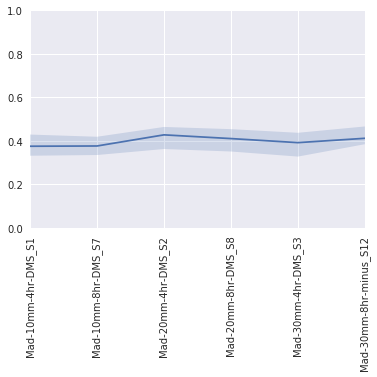

In [78]:
sns.set(font_scale=1)
ratios_readCounts_DMS_matrix = ratios_readCounts_DMS.values
ax = sns.tsplot(data=ratios_readCounts_DMS_matrix,estimator=np.median)
#ax.set(xticklabels=)
ax.set_xticklabels(labels=ratios_readCounts_DMS_avg.index.values,rotation=90)
plt.ylim(0, 1)

In [ ]:
max_ratio = ratios_readCounts_DMS.apply(max,axis=1)
ratios_readCounts_DMS_Normalized = ratios_readCounts_DMS.divide(max_ratio, axis='index')
ratios_readCounts_DMS_Normalized.head()

In [ ]:
# Lets the average for every time point and concentration
ratios_readCounts_DMS_Normalized_avg = ratios_readCounts_DMS_Normalized.apply(np.mean,axis=0)
ratios_readCounts_DMS_Normalized_avg

In [ ]:
sns.set(font_scale=1)
ratios_readCounts_DMS_Normalized_matrix = ratios_readCounts_DMS_Normalized.values
ax = sns.tsplot(data=ratios_readCounts_DMS_Normalized_matrix,estimator=np.median,ci="sd")
#ax.set(xticklabels=)
ax.set_xticklabels(labels=ratios_readCounts_DMS_Normalized_avg.index.values,rotation=90)
plt.ylim(0, 1.5)

In [ ]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(100,100))
#sns.heatmap(ratios_readCounts_DMS,cmap="RdBu_r",vmax=1,vmin=0,yticklabels=True,center=0.5, ax=ax)
sns.heatmap(ratios_readCounts_DMS,cmap=sns.light_palette("navy", reverse=False),vmax=1,vmin=0,yticklabels=True, ax=ax)

In [ ]:
ax = sns.clustermap(ratios_readCounts_DMS,cmap=sns.light_palette("navy", reverse=False),annot=False, square=False, yticklabels=True, figsize=(75,75))
reordered_indices = ax.dendrogram_row.reordered_ind

In [ ]:
labels_indices_org = ratios_readCounts_DMS.index.values
labels_indices_reordered = labels_indices_org[reordered_indices]
# Reorder the feature counts indices 
ratios_readCounts_DMS= ratios_readCounts_DMS.reindex(labels_indices_reordered)

In [ ]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(100,100))
#sns.heatmap(ratios_readCounts_DMS,cmap="RdBu_r",vmax=1,vmin=0,yticklabels=True,center=0.5, ax=ax)
sns.heatmap(ratios_readCounts_DMS,cmap=sns.light_palette("navy", reverse=False),vmax=1,vmin=0,yticklabels=True, ax=ax)

In [ ]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(100,100))
#sns.heatmap(ratios_readCounts_DMS,cmap="RdBu_r",vmax=1,vmin=0,yticklabels=True,center=0.5, ax=ax)
sns.heatmap(ratios_readCounts_DMS_Normalized,cmap=sns.light_palette("navy", reverse=False),vmax=1,vmin=0,yticklabels=True, ax=ax)

In [ ]:
ax = sns.clustermap(ratios_readCounts_DMS_Normalized,cmap=sns.light_palette("navy", reverse=False),annot=False, square=False, yticklabels=True, figsize=(75,75))
reordered_indices = ax.dendrogram_row.reordered_ind

In [ ]:
labels_indices_org = ratios_readCounts_DMS_Normalized.index.values
labels_indices_reordered = labels_indices_org[reordered_indices]
# Reorder the feature counts indices 
ratios_readCounts_DMS_Normalized= ratios_readCounts_DMS_Normalized.reindex(labels_indices_reordered)

In [ ]:
sns.set(font_scale=2)
fig, ax = plt.subplots(figsize=(100,100))
#sns.heatmap(ratios_readCounts_DMS,cmap="RdBu_r",vmax=1,vmin=0,yticklabels=True,center=0.5, ax=ax)
sns.heatmap(ratios_readCounts_DMS_Normalized,cmap=sns.light_palette("navy", reverse=False),vmax=1,vmin=0,yticklabels=True, ax=ax)